# CSE 601 Data Mining and Bioinformatics
# Project 2: Clustering Algorithms

# Part 2: Gaussian Mixture Model Clustering
Description: This program conducts clustering algorithm on gene expressions datasets (cho.txt and iyer.txt) to find clusters of genes that exhibit similar expression profiles.

Submitted By:
    
Name: Karan Manchandia | 
UBIT: karanman | 
Person No.: 50290755
    
Name: Divya Srivastava | 
UBIT: divyasri | 
Person No.: 50290383

Name: Varsha Lakshman | 
UBIT: varshala | 
Person No.: 50288138 

In [1]:
#Importing Libraries

import sys
import random
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans
import matplotlib.pyplot as maplot
from scipy.stats import multivariate_normal as mvn
from sklearn.decomposition import PCA
import matplotlib.cm as mapcm

In [2]:
# Enter the data file name, open it and assign it to the variable data_file
while True:
    try:
        my_file = input("Enter the name of the gene expression data file:")
        data_file = open(my_file)
        
    # In case of a error the except block will be executed
    except:
        print("Error: Could not find file or read data")
        continue
        
    # This block will be executed after correct data file name is entered
    else:
        print("Correct data file found and imported\n")
        print("----------------------------------------------------------------------------------------\n")
        break
    
#set the numpy matrix to display maxsize
np.set_printoptions(threshold=sys.maxsize)

#set numpy matrix to display floating point numbers 
np.set_printoptions(suppress=True)

# Load the data from tab delimited text file
# genfromtxt function imports the text file into a numpy matrix 
# INPUT parameters: my_file and deliminator
# if (my_file =="GMM.txt"):
#     data__file = np.genfromtxt(data_file, delimiter = " ")
# else:
data__file = np.genfromtxt(data_file, delimiter = "\t")

# We have removed the gene id and ground truth cluster column when importing data from the text file into a numpy matrix
main_data = data__file[:,2:]

gr_truth = data__file[:,1:2]

# Print given data file numpy matrix
print(f"The given data file in a numpy matrix is shown below: \n\n{main_data}")


Enter the name of the gene expression data file:cho.txt
Correct data file found and imported

----------------------------------------------------------------------------------------

The given data file in a numpy matrix is shown below: 

[[-0.69  -0.96  -1.16  -0.66  -0.55   0.12  -1.07  -1.22   0.82   1.4
   0.71   0.68   0.11  -0.04   0.19   0.82 ]
 [-0.21   0.19   0.86   0.04  -0.35  -0.39  -0.51  -0.2    0.     0.77
   0.41   0.14  -0.45  -1.23  -0.325  0.   ]
 [-0.3   -0.56  -0.29  -0.5   -0.27  -0.29  -0.56  -1.04   0.32   0.9
   0.45   0.17   0.164 -0.12  -0.16   0.67 ]
 [ 0.07   0.26  -0.47  -0.68  -0.63  -0.39   0.07   0.79   0.58   0.31
  -0.14  -0.29  -0.103 -0.2   -0.06   0.36 ]
 [-1.04   0.13   0.51  -0.44  -0.88  -0.32   0.21   0.95   1.07   0.38
   0.01  -0.13  -0.78  -0.13   0.092  0.   ]
 [-1.17   0.09  -0.52  -1.04  -1.16  -0.83   0.17   0.93   0.89   0.52
  -0.24  -0.46  -0.215  0.2    0.91   0.68 ]
 [-0.16   0.35  -0.13  -0.26  -0.4   -0.47   0.1    0.74   0.45   

In [3]:
# Asking to enter values
input_values = input("Do you want to enter parameters(mu, pi and sigma). Y/N?")
if (input_values == 'Y'):
    give_mps = True
elif (input_values == 'N'):
    give_mps = False

Do you want to enter parameters(mu, pi and sigma). Y/N?N


In [4]:
# Taking inputs for number of clusters, max iterattions, threshold value and smoothing value.
k = int(input("Enter the number of clusters"))
iterations_1 = int(input("Enter the number of maximum iterations"))
threshold_val = float(input("Enter the threshold value"))
smth_value = float(input("Enter the smoothing value"))

Enter the number of clusters5
Enter the number of maximum iterations100
Enter the threshold value1e-08
Enter the smoothing value0.0001


In [5]:
# Defining some initial sizes and shapes for further use.

rows_no = len(main_data) 
col_no = main_data.shape[1]

# Defining empty mu, pi and sigma
mu = np.zeros((k,col_no))
sigma = np.zeros((k,col_no,col_no))
pi = np.zeros(k)

In [6]:
# if give_mps is true take mu, pi and sigma as input from user
if give_mps:
    mu = np.asarray([[0, 0], [1, 1]], dtype=np.float64)
    sigma = np.asarray([[[1,1], [1,1]], [[2,2], [2,2]]], dtype=np.float64)
    pi = np.asarray([0.5, 0.5] , dtype=np.float64)

# if give_mps is false initialize mu pi and sigma using kmeans
else: 
    # Running K-means to initialize mu, pi and sigma  
    # library implementation of kmeans 
    k_set = KMeans(init="k-means++", n_clusters= k, max_iter=500, algorithm = 'auto')
    #fitting our data to kmeans(k_set)
    k_set.fit(main_data)
    #predicting the results
    k_set_results = k_set.predict(main_data)
    #finding kmeans labels
    lab_kmeans = np.array(list(set(k_set_results)))
    temp1=0
    len_data = len(main_data)
    #Populating mu, sigma and pi using kmeans results
    for item in lab_kmeans:
        temp2 = np.where(k_set_results == item)
        pi[temp1] = len(temp2[0]) / len_data
        mu[temp1] = np.mean(main_data[temp2], axis = 0)
        sigma[temp1,:, :] = np.dot(pi[temp1] * (main_data[temp2] - mu[temp1,:]).T, (main_data[temp2] - mu[temp1,:])) / (main_data[temp2].shape[0])
        temp1 = temp1 + 1

In [7]:
# Printing initialized mu , pi and sigma with their shapes
print(f"The dimentions of sigma is:{sigma.shape}\n")
print(f"Initialized Sigma is shown below:\n{sigma}")
print("\n---------------------------------------------------------------------------------\n")
print(f"The dimentions of mu is:{mu.shape}\n")
print(f"Initialized mu is shown below:\n{mu}")
print("\n---------------------------------------------------------------------------------\n")
print(f"The dimentions of pi is:{pi.shape}\n")
print(f"Initialized pi is shown below:\n{pi}")
print("\n---------------------------------------------------------------------------------\n")

The dimentions of sigma is:(5, 16, 16)

Initialized Sigma is shown below:
[[[ 0.0815356   0.02188175 -0.00237171 -0.00760011 -0.01332572
   -0.01000017 -0.00488116  0.00912875  0.01386963 -0.03139009
   -0.02446087 -0.01747643 -0.01445334 -0.01376438  0.01599657
    0.01161459]
  [ 0.02188175  0.06685848  0.02273804  0.00204196 -0.0115447
   -0.00631109 -0.0110175  -0.01405732 -0.00602825 -0.0062319
   -0.01466577 -0.01514861 -0.01136715 -0.01138322  0.00055704
   -0.01168368]
  [-0.00237171  0.02273804  0.05188756  0.02568521 -0.00965904
   -0.00468572 -0.01123935 -0.02994109 -0.02406246  0.01215541
    0.00855264  0.0069883  -0.0013261  -0.00999351 -0.02201348
   -0.01881347]
  [-0.00760011  0.00204196  0.02568521  0.04247166  0.01713661
    0.00335479 -0.00687064 -0.01848395 -0.02096927 -0.00487667
    0.00399952  0.01013194  0.00444059 -0.0037025  -0.01360789
   -0.01547953]
  [-0.01332572 -0.0115447  -0.00965904  0.01713661  0.05509008
    0.01590741  0.01315666  0.00878858 -0.010

In [8]:
# Defining Gaussian Mixture Model Class
class GaussianMixtureModel:
    '''
    This class performs Estep Mstep on the data and calculates log likelihood
    Input to the Instance of this class: No. of clusters, max iterations, data, mu, pi, sigma, no. of rows and no. of columns in data 
    This class gives final mu, pi and sigma values, log likelihood after every 10 iterations and the final predicted clusters
    '''
    
    # defining init method. This method will be executed when we create and instance of the class
    def __init__(self, clstr_no, max_iter, given_data, mu, pi, sigma, rows_no, col_no):
        
        # Assigning class attributes
        self.clstr_no = clstr_no
        self.max_iter = max_iter
        self.rows_no = rows_no
        self.col_no = col_no
        self.gamma = np.zeros((self.rows_no, self.clstr_no))
        self.sigma = sigma
        self.mu = mu
        self.pi = pi
        
    # Method to find cluster labels
    def clustering(self, main_data):
        temp_a = len(main_data)
        clstr_lab = np.empty((temp_a, self.clstr_no))
        clstr_lab  = self.gamma.argmax(1)
        print(f"Labels: {clstr_lab}")
        return clstr_lab
    
    def em_likeh_step(self, main_data, threshold_val, smth_value):
        iteration = 0
        initial_loss = 0
        mu, pi, sigma = self.mu, self.pi, self.sigma 
#         prev_loss = 0
        while iteration < (self.max_iter):
            temp11 = 0
            # Start of Estep
            while temp11 < (self.clstr_no):
                #calculating probablity 
                try:
                    mvn.pdf(main_data, self.mu[temp11,:], self.sigma[temp11])
#               In case of an error the except block will be executed
                # In case a singular matrix is raised this will add smoothing value to digonal
                except:
                    temp22 = smth_value
                    self.sigma[temp11][np.diag_indices(self.sigma[temp11].shape[0])] =  self.sigma[temp11][np.diag_indices_from(self.sigma[temp11])] + temp22
                temp23 = self.mu[temp11,:]
                temp24 = self.sigma[temp11]
                self.gamma[:,temp11] = self.pi[temp11] * mvn.pdf(main_data, temp23, temp24)
                temp11 += 1  
                
            gamma_norm = np.sum(self.gamma, axis=1)[:,np.newaxis]
            self.gamma = self.gamma / gamma_norm
            
            # End of Estep
            
            # Start of Mstep
            self.pi = np.mean(self.gamma, axis = 0)
            dot_prod = np.dot(self.gamma.T, main_data)
            sum_calc = np.sum(self.gamma, axis = 0)
            self.mu = dot_prod / sum_calc[:,np.newaxis]
            item4 = 0
            while item4 < (self.clstr_no):
                diagonal_ga = np.matrix(np.diag(self.gamma[:,item4]))
                x_mu = np.matrix((main_data - self.mu[item4, :]))
                d_sig = (main_data - self.mu[item4, :]).T * diagonal_ga * (main_data - self.mu[item4, :])
                self.sigma[item4]=(d_sig) / np.sum(self.gamma, axis = 0)[:,np.newaxis][item4]
                item4 = item4 + 1
            # End of Mstep
            # Calculation of log_likelyhood
            self.likeh = np.zeros((self.rows_no, self.clstr_no))
            item5 = 0
            while item5 < (self.clstr_no):
                pro = mvn(self.mu[item5], self.sigma[item5],allow_singular=True)
                gamma_item5 = self.gamma[:,item5]
                # for handling 0 log value
                log_item5 = (np.log(self.pi[item5]+0.00001)+pro.logpdf(main_data)-np.log(self.gamma[:,item5]+0.000001))
                self.likeh[:,item5] = gamma_item5 * log_item5
                item5 += 1
            self.likeh = np.sum(self.likeh)
            if abs(self.likeh - initial_loss) < threshold_val:
                print("Change betwwen likelyhoods below threshold.")
                print(f"The current iteration number is {iteration} and the log likelyhood is {self.likeh:{15}.{12}}")
                print("\n----------------------------------------------------------------------------------------------\n")
                return self
            if iteration % 5 == 0:
                print(f"The current iteration number is {iteration} and the log likelyhood is {self.likeh:{15}.{12}}")
                print("\n----------------------------------------------------------------------------------------------\n")
            initial_loss = self.likeh
            iteration += 1
        return self


In [9]:
# initializing object for the GMM class
obj_gmm = GaussianMixtureModel(k, iterations_1, main_data, mu, pi, sigma, rows_no, col_no)

# Calling em_likeh_step function on the GMM class object
results = obj_gmm.em_likeh_step(main_data, threshold_val, smth_value)

# Printing Estimated Parameters
print("Estimated parameters are:")
print(f"The Estimated parameter pi is shown below:\n{obj_gmm.pi}")
print("\n----------------------------------------------------------------------------------------------\n")
print(f"The Estimated parameter sigma is shown below:\n{obj_gmm.sigma}")
print("\n----------------------------------------------------------------------------------------------\n")
print(f"The Estimated parameter mu is shown below:\n{obj_gmm.mu}")
print("\n----------------------------------------------------------------------------------------------\n")

The current iteration number is 0 and the log likelyhood is  -1260.51974635

----------------------------------------------------------------------------------------------

The current iteration number is 5 and the log likelyhood is  -1215.78032824

----------------------------------------------------------------------------------------------

The current iteration number is 10 and the log likelyhood is  -1204.86192962

----------------------------------------------------------------------------------------------

The current iteration number is 15 and the log likelyhood is  -1203.37063777

----------------------------------------------------------------------------------------------

The current iteration number is 20 and the log likelyhood is  -1201.95603549

----------------------------------------------------------------------------------------------

The current iteration number is 25 and the log likelyhood is  -1201.95208158

------------------------------------------------------

In [10]:
# calling the clustering method from the class gmm
labels_final = obj_gmm.clustering(main_data)
clstr_assignment = labels_final.reshape((len(main_data),1)) 

Labels: [4 0 4 1 4 1 1 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 4 0 3 2 4 0 4 4 4 4 0
 4 4 4 4 4 1 0 1 4 4 0 4 4 4 4 4 4 1 1 4 4 1 4 4 0 0 0 0 4 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 4 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 0 0 0 0 3 0 0 0 0 0 0 0 0 3 0 4 3 4 1 0 0 0 4 0 0 3 0 0 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 4 4 0 0 0 0
 0 4 4 4 4 4 0 0 0 0 0 0 0 4 0 0 0 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 0 0 3 0 3
 0 0 0 3 3 0 3 0 0 3 3 3 3 3 3 4 3 0 0 3 3 3 0 0 0 3 3 3 3 0 0 3 3 3 3 3 3
 3 3 3 3 3 0 3 3 3 0 3 3 0 0 0 3 3 0 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2
 2 2 2 1 1 2 2 3 3 3 3 2 3 1 3 2 2 1 3 3 1 1 1 1 1 1 0 3 1 1 4 1 1 1 2 1 0
 1 3 2 1 2 3 1 2 1 2 2 4 4 2 1 2]


In [11]:
# Performing dimensionality reduction on the data
pca_temp = PCA(n_components = 2)
pca_result = pca_temp.fit_transform(main_data)

# Creating the final data frame
df_final_result = np.concatenate((pca_result, clstr_assignment), axis = 1)
df_final_result = pd.DataFrame({'Principle_Component_1': df_final_result[:, 0], 'Principle_Component_2': df_final_result[:, 1], 'Cluster': df_final_result[:, 2]})

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'Principle Component 2')

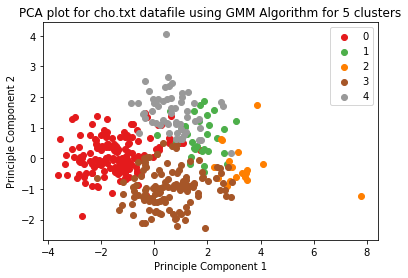

In [12]:
# Plotting the graph
plot1 = maplot.figure()
plot11 = plot1.add_subplot(111)

temp_11 = []
for i in range(k):
    temp_11.append(i)
temp_t = temp_11
# Defining variable colours    
var_col = mapcm.Set1(np.linspace (0,1,k))
np.asarray(var_col)

# Printing the graph
for temp_11, var_col in zip(temp_11,var_col):
    temp_12 = df_final_result['Cluster'] == temp_11
    plot11.scatter(df_final_result.loc[temp_12, 'Principle_Component_1'], df_final_result.loc[temp_12, 'Principle_Component_2'], c = var_col)

#giving the location of the legend as "best"
#This would place the legend at the location in the graph that would overcover minimum data points
#plot11.legend(loc='best')
plot11.legend(temp_t)
# Giving X axis label
plot11.set_xlabel('Principle Component 1')

# Giving the title for the graph
plot11.set_title(f"PCA plot for {my_file} datafile using GMM Algorithm for {k} clusters")

# Giving Y axis label
plot11.set_ylabel('Principle Component 2')

# Saving the scatter plot as a PDF file
# maplot.savefig(f"PCA plot for {my_file} datafile using HAC Algorithm for {no_of_clusters} clusters")


In [13]:
# Jaccard Cofficient and Rand Index

# Defining empty ground truth and clustering matrix
ground_truth_matrix = np.empty((len(clstr_assignment),len(clstr_assignment)))
cluster_truth_matrix = np.empty((len(clstr_assignment),len(clstr_assignment)))

i = 0
while i<(len(clstr_assignment)):
    j = 0
    while j < (len(clstr_assignment)):
        if (clstr_assignment[i]==clstr_assignment[j]):
            ground_truth_matrix[i][j] = 1
        else:
            ground_truth_matrix[i][j] = 0
        if (gr_truth[i]==gr_truth[j]):
            cluster_truth_matrix[i][j] = 1
        else:
            cluster_truth_matrix[i][j] = 0
        j += 1
    i += 1
    
# f11 = no. of pairs of objects having same class and same clusters
# f00 = no. of pairs of objects having different class and different clusters
# f01 = no. of pairs of objects having different class and same clusters
# f10 = no. of pairs of objects having same class and different clusters
f11=0
f00=0
f10=0
f01=0

# Calculating the values of same_class, same_cluster, different_class, different cluster table(in theory)
temp9 = 0
while temp9 < (cluster_truth_matrix.shape[0]):
    temp10 = 0
    while temp10 < (ground_truth_matrix.shape[1]):
        if (cluster_truth_matrix[temp9,temp10] == 1 and ground_truth_matrix[temp9,temp10] == 1):
            f11 += 1
        elif (cluster_truth_matrix[temp9,temp10] == 0 and ground_truth_matrix[temp9,temp10] == 0):
            f00 += 1
        elif (cluster_truth_matrix[temp9,temp10] == 0 and ground_truth_matrix[temp9,temp10] == 1):
            f10 += 1
        elif (cluster_truth_matrix[temp9,temp10] == 1 and ground_truth_matrix[temp9,temp10] == 0):
            f01 += 1
        temp10 += 1
    temp9 += 1

# Calculating and printing the Jaccard Cofficient and Rand Index
print(f"The Jaccard Cofficient for GMM Algorithm({my_file}) for {k} clusters is: {f11/(f11+f10+f01)}")
print(f"The Rand Index for GMM Algorithm({my_file}) for {k} clusters is: {(f11+f00)/(f11+f10+f01+f00)}")
            


            


The Jaccard Cofficient for GMM Algorithm(cho.txt) for 5 clusters is: 0.38265666996746356
The Rand Index for GMM Algorithm(cho.txt) for 5 clusters is: 0.7656849848318076
